![CC](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

Author(s): Janis Geise, Andre Weiner

# A brief introduction to Python programming

## Overview

Note that this notebook does not provide a comprehensive introduction to Python programming. It aims to explain Python functionality frequently used throughout lecture and exercise notebooks that students typically struggle with at the beginning. If you are already an experienced Python programmer, feel free to quickly skim through the notebook or to skip it entirely. If you consider yourself as a beginner both in Python and programming in general, we provide a list of resources for self-study at the end of this notebook. The following topics will be covered in this notebook:

- Built-in functions and data types
- Functions and lambda functions
- Object-oriented programming
- Plotting with Matplotlib  
  - Line plots  
  - Scatter plots  
  - Contour lines and filled contours
  - sub-plots  
- PyTorch tensors  
  - Working with tensors  
  - Common tensor operations
- Handling column-like data with Pandas
- Understanding error messages
- References

## Built-in functions and data types

Python provides a number of [built-in functions](https://docs.python.org/3/library/functions.html) and data types to simplify and accelerate common tasks. While some of these functions and structures are intuitively clear for anyone with basic math and programming knowledge, e.g., `abs()` for computing the absolute value of a number, others may be harder to understand. This section discusses a few heavily-used built-in functions and data structures.

### Lists, tuples, and dictionaries

Lists in Python are iterable containers in which objects of different types can be stored. Common attributes of lists are that we can iterate through them, append or delete list items, or merge them. In contrast to lists, tuples have a fixed length, which is defined when creating the tuple. Dictionaries are containers for data that come as key-value-pairs. The key might be the name of a person and the value might be the person's email address.

In [13]:
# create a list of strings
labels = ["x", "U"]
print(labels)

# append another label
labels.append("p")
print(labels)

# get the first and last elements of the list
print(f"The first label is {labels[0]} and the last label is {labels[-1]}")

# delete the first list element
del labels[0]
print(labels)

# append one list to another
print(labels + ["x", "y"])

# convert a list to a tuple
labels_tuple = tuple(labels)
print(labels_tuple)

# store the unit associated with the label in a dictionary
labels_and_units = {}
labels_and_units["x"] = "m"
labels_and_units["U"] = "m/s"
print(labels_and_units)

['x', 'U']
['x', 'U', 'p']
The first label is x and the last label is p
['U', 'p']
['U', 'p', 'x', 'y']
('U', 'p')
{'x': 'm', 'U': 'm/s'}


In [14]:
# the length of a tuple is fixed
labels_tuple.append("a")

AttributeError: 'tuple' object has no attribute 'append'

### Looping through iterables

Both lists and tuples are iterables, meaning that we can iterate/loop through them. There are a number of strategies to iterate through one or multiple iterables, which are demonstrated in the next cell.

In [15]:
# classical C-like looping:
# 1. determine the length of the list  with len()
# 2. create an iterator of indices starting from 0
# 3. use the loop variable i to access list elements
for i in range(len(labels)):
    print(f"Label {i}: {labels[i]}")

Label 0: U
Label 1: p


In [16]:
# a much more "Pythonic" way of looping over the list items
for label in labels:
    print(label)

U
p


In [17]:
# in case the list index is really needed, use enumerate()
for i, label in enumerate(labels):
    print(f"Label {i}: {label}")

Label 0: U
Label 1: p


In [18]:
# Pythonic loop over multiple iterables
units = ("m/s", "Pa")
for label, unit in zip(labels, units):
    print(f"{label} in {unit}")

U in m/s
p in Pa


In [19]:
# the same as above combined with enumerate
for i, (label, unit) in enumerate(zip(labels, units)):
    print(f"Label {i}: {label} in {unit}")

Label 0: U in m/s
Label 1: p in Pa


Both `zip()` and `enumerate()` return iterators. In contrast to lists or tuples, the content of iterators is only retrieved or created when it is really needed. For example, if we want to load and process large files stored on the hard drive, an iterator allows loading and processing one file after the other in order to reduce the memory consumption. However, in most cases considered here, we can simply convert the iterator into a list or tuple.

In [20]:
# create an iterator for labels and units
labels_and_units = zip(labels, units)

# convert the iterator to a list of tuples and print the list
print(list(labels_and_units))

# printing the iterator directly does not have the desired effect
print(labels_and_units)

# moreover, we don't have an index-based access to the iterator
print(labels_and_units[0])

[('U', 'm/s'), ('p', 'Pa')]


TypeError: 'zip' object is not subscriptable

A common error source when working with `zip()` is the handling of iterables with varying lengths. The iteration stops when the length of the shorted iterable passed to `zip()` is reached.

In [21]:
labels.append("x")
# we unpack the iterator for printing using *
print(*zip(labels, units))

('U', 'm/s') ('p', 'Pa')


Looping over the keys and values of a dictionary works in a similar way as described for list and tuples. The methods `keys()`, `values()`, and `items()` provide us with iterators for the dictionary's keys, values, or key-value-pairs, respectively. Similar to the index-based access to the content of lists and tuples, we can access the value associated with a key using the `[]` operator.

In [23]:
labels_and_units = {}
labels_and_units["x"] = "m"
labels_and_units["U"] = "m/s"

# for each key/label, print its value/unit
for key in labels_and_units.keys():
    print(f"The unit of {key} is {labels_and_units[key]}")

# loop over keys and values with zip
for key, value in zip(labels_and_units.keys(), labels_and_units.values()):
    print(f"The unit of {key} is {value}")

# even short than above
for key, value in labels_and_units.items():
    print(f"The unit of {key} is {value}")

The unit of x is m
The unit of U is m/s
The unit of x is m
The unit of U is m/s
The unit of x is m
The unit of U is m/s


### List and dictionary comprehensions

Comprehensions are an efficient way of creating new lists or dictionaries without for-loops. Especially, if a task needs to be repeated multiple times, comprehensions are short, clear and efficient. The general syntax is:

```
# list comprehension
result = [result_based_on_item for item in iterable]
# dictionary comprehension
result = {key_base_on_item : value_base_on_item for item in iterable}
```

In [24]:
# create a list of squared values
list_of_numbers = [i**2 for i in range(10)]
print(list_of_numbers)

# create dictionary with string representations
numbers_as_strings = {i : f"({i})" for i in list_of_numbers}
print(numbers_as_strings)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
{0: '(0)', 1: '(1)', 4: '(4)', 9: '(9)', 16: '(16)', 25: '(25)', 36: '(36)', 49: '(49)', 64: '(64)', 81: '(81)'}


Another common pattern is the addition of a logical statement to the comprehension. The extended syntax is:

```
# simple if condition
result = [result_based_on_item for item in iterable if condition_based_on_item]
# if-else condition
result = [result_true if condition else results_false for item in iterable]
# if-else condition for dictionaries
results = {(key_true if key_condition else key_false) : (value_true if value_condition else value_false ) for items in iterable}
```

In [25]:
# print only even numbers
even_numbers = [i for i in list_of_numbers if i % 2 == 0]
print(even_numbers)

# create a dictionary with even-odd-labeling
even_odd = {i : ("even" if i % 2 == 0 else "odd") for i in list_of_numbers}
print(even_odd)

[0, 4, 16, 36, 64]
{0: 'even', 1: 'odd', 4: 'even', 9: 'odd', 16: 'even', 25: 'odd', 36: 'even', 49: 'odd', 64: 'even', 81: 'odd'}


It is also possible to nest multiple comprehensions and conditionals. However, the resulting statements are often hard to read and error-prone. As a rule of thumb, there should be never more than two `for` statements inside the square or curly brackets.

## Functions and Lambda functions

Functions are the simplest and most common way to avoid code duplication and to improve the program's modularity and readability. In the function header, zero or more function parameters may be defined. Optionally, we can provide default arguments (values) for some of the parameters. The optional parameters always follow at the end of the parameter list. Moreover, functions may or may not return a result.

In [26]:
# function without return argument
def print_greeting(first_name, family_name):
    print(f"Hello {first_name} {family_name}!")

print_greeting("Horace", "Lamb")

Hello Horace Lamb!


In [27]:
# function with optional and return argument
def format_arguments(parameters, arguments, separator=", "):
    formatted_arguments = separator.join(
        [f"{param}={arg}" for param, arg in zip(parameters, arguments)]
    )
    return formatted_arguments

# print with default separator
print(format_arguments(("a", "b"), (1, 2)))

# print with different separator
print(format_arguments(("a", "b"), (1, 2), "; "))

a=1, b=2
a=1; b=2


Even though Python is an interpreted language without strict typing, it is good practice to use so-called type hints in the function definition. However, note that the type hints are not checked or enforced by the interpreter. Their main purpose is improved code readability and improved documentation, e.g., when using automatic documentation generators like [Sphinx](https://www.sphinx-doc.org/en/master/).

In [28]:
# same as the last function above but with type hints
def format_arguments(parameters: list, arguments: list, separator: str = ", ") -> str:
    formatted_arguments = separator.join(
        [f"{param}={arg}" for param, arg in zip(parameters, arguments)]
    )
    return formatted_arguments

print(format_arguments(("a", "b"), (1, 2), "; "))

a=1; b=2


Python supports multiple assignments in a single statement (line). Moreover, functions can return multiple arguments packed in a tuple. We can assign this tuple to a variable, or we can unpack the tuple into the individual return arguments.

In [29]:
# more specific type hinting
from typing import Tuple

def format_labels(x_label: str, y_label: str, x_unit: str, y_unit: str) -> Tuple[str, str]:
    label_with_unit_x = f"{x_label} in {x_unit}"
    label_with_unit_y = f"{y_label} in {y_unit}"
    return label_with_unit_x, label_with_unit_y

# print the packed return arguments
print(format_labels("x", "y", "m", "m/s"))

# unpack into individual parameters, then print
label_x, label_y = format_labels("x", "y", "m", "m/s")
print(f"The figure shows {label_x} plotted against {label_y}")

# we can combine the unpacking and printing in a single statement using *
print("The figure shows {:s} plotted against {:s}".format(*format_labels("x", "y", "m", "m/s")))

('x in m', 'y in m/s')
The figure shows x in m plotted against y in m/s
The figure shows x in m plotted against y in m/s


Lambda functions are small functions with limited complexity. In contrast to normal functions, lambda-functions consist of a single expression and are typically defined in a single line of code. Due to their limited complexity, they are often defined in place as arguments for other functions. The general syntax is:

```
lambda argument_1, argument_2, ..., argument_N: what_to_do
```
If the same lambda-functions ais employed repeatedly, we can also assign it to a variable.

In [30]:
# use lambda function to extract name suffix
get_suffix = lambda name, separator: name.split(separator)[-1]
folders = [f"case_{i}" for i in range(0, 21, 5)]
suffixes = [get_suffix(folder, "_") for folder in folders]
for folder, suffix in zip(folders, suffixes):
    print(f"Folder {folder} has suffix {suffix}")

# imagine you want to sort the folders according to their suffix;
# naively, we could pass the list of folders to the sorted function
print("Wrong sorting: ", sorted(folders))
# as you can see in the output, the items are sorted character by character;
# therefore, case_10 is listed before case_5; in some situations we may easily
# miss such a mistake, e.g., when testing only suffixes between 0 and 9

# solution: we need to be more precise about the sorting criterion;
# we want to sort based on the suffix and we want the suffix to be interpreted as integer and not as string
# the criterion can be passed to the sort function using the 'key' parameter
print("Correct sorting: ", sorted(folders, key=lambda case: int(case.split("_")[-1])))

Folder case_0 has suffix 0
Folder case_5 has suffix 5
Folder case_10 has suffix 10
Folder case_15 has suffix 15
Folder case_20 has suffix 20
Wrong sorting:  ['case_0', 'case_10', 'case_15', 'case_20', 'case_5']
Correct sorting:  ['case_0', 'case_5', 'case_10', 'case_15', 'case_20']


## Object-orientated programming in python

As many other programming languages, Python supports object-orientated programming. The following section provides a brief overview of object-orientated programming in python.

### General structure and initialization

In Python, user-defined data types are defined with the keyword `class`. The class itself needs to have an `.__init__()` method in order to initialize attributes and methods.

In [31]:
# let's define a simple class
class SimpleClass():
    # currently the __init__() method is empty, so the class won't do anything
    def __init__(self):
        pass
    
# the class can now be instantiated
new_class = SimpleClass()

# and we can add some attributes
new_class.new_attribute = 42

print("new class attribute:", new_class.new_attribute)

new class attribute: 42


The keyword `self` represents the instance of the class and is required for accessing any attributes or methods of the class.

In [32]:
# we can initialize a class directly with attributes and methods as well:
class AddNumbers():
    # in this case, the value for y is given by default
    def __init__(self, x, y = 2):
        self.x = x
        self.y = y
    
    # method for adding two numbers
    def add_two_numbers(self):
        return self.x + self.y
    
# since the value for y is given by default we can instanciate the class only ba passing in x as argument
add = AddNumbers(x=1)
print(f"x, y = {add.x}, {add.y}")
print(f"{add.x} + {add.y} = {add.add_two_numbers()}")

# alternatively, we can assign values for x and y when creating the instance
add_2 = AddNumbers(x=5, y=37)
print(f"{add_2.x} + {add_2.y} = {add_2.add_two_numbers()}")

x, y = 1, 2
1 + 2 = 3
5 + 37 = 42


### Inheritance

Python supports inheritance, which allows to inherit methods and properties from other classes. This is quite convenient, because methods which are already implemented can be used and extended without the necessity to write everything from scratch. Considering the previous example, imagine we now want to add two numbers and then compute the mean of it:

In [33]:
# we could implement a completly new class from scratch...
class ComputeMean():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # method for adding two numbers
    def mean_of_two_numbers(self):
        return (self.x + self.y) / 2
    
# now compute the mean of two numbers
comp_mean = ComputeMean(5, 3)
print("mean of 5 and 3 = ", comp_mean.mean_of_two_numbers())

mean of 5 and 3 =  4.0


In [34]:
# ... but a more efficient way is inheriting the properties of our previously implemented class 'AddNumbers':
class ComputeMean(AddNumbers):
    def __init__(self, x, y):
        # we need to initialize the parent class with the method 'super()' and also the attributes we want to access
        super().__init__(x, y)
        
    def mean_of_two_numbers(self):
        # now we can use the method 'add_two_numbers()' we already implemented in the parent class
        return AddNumbers.add_two_numbers(self) / 2
    
# compute the mean of 8 and 4
comp_mean = ComputeMean(8, 4)
print("mean of 8 and 4 = ", comp_mean.mean_of_two_numbers())

# but we can also directly access the 'add_two_numbers' method from the parent class without calling it
print("8 + 4 = ", comp_mean.add_two_numbers())

mean of 8 and 4 =  6.0
8 + 4 =  12


The parent class from which we want to inherit the properties needs to be passed into our child class as argument, as can be seen in the above examples. Further, we need to initilize the parent class by calling the built-in `super()` method. This allows us to access methods and other properties of the parent class without the need to implement them again in the child class. When calling the `super()` method, the attributes we want to initialize need to be passed into the `__init()__` method as well, e.g. the following would not work, since we didn't initialize the attribute `y`:

In [35]:
class ComputeMean(AddNumbers):
    def __init__(self, x, y):
        # if we forget to initialize the attributes, then we won't have access to it
        super().__init__()
        
    def mean_of_two_numbers(self):
        return AddNumbers.add_two_numbers(self) / 2
    
# compute the mean of 8 and 4
comp_mean = ComputeMean(x=4, y=8)
print("mean of 8 and 4 = ", comp_mean.mean_of_two_numbers())

TypeError: AddNumbers.__init__() missing 1 required positional argument: 'x'

In [36]:
class ComputeMean(AddNumbers):
    def __init__(self, x, y):
        # let's just initialize y and see what happens
        super().__init__(y)
        
    def mean_of_two_numbers(self):
        return AddNumbers.add_two_numbers(self) / 2
    
# compute the mean of 8 and 4
comp_mean = ComputeMean(x=4, y=8)
print("mean of 8 and 4 = ", comp_mean.mean_of_two_numbers())

mean of 8 and 4 =  5.0


In this case, the parameter `y` which is passed into our `super().__init__()` method is interpreted as `x`, since the `y` parameter is already set by default and therefore not required. The Python interpreter assumes that, if only one argument is given, it has to be the parameter `x`. If we want Python to interpret this one parameter as `y`, we have to use a keyword argument:

In [37]:
class ComputeMean(AddNumbers):
    def __init__(self, x, y):
        # this time we specificly initialize the parameter y as y
        super().__init__(y=y)
        
    def mean_of_two_numbers(self):
        return AddNumbers.add_two_numbers(self) / 2
    
# compute the mean of 8 and 4
comp_mean = ComputeMean(x=4, y=8)
print("mean of 8 and 4 = ", comp_mean.mean_of_two_numbers())

TypeError: AddNumbers.__init__() missing 1 required positional argument: 'x'

Now we get the error message again, showing us that we forgot to initialize the `x` parameter.

### Decorators

Functions are represented as objects in python and can therefore be passed into other functions as arguments or returned by functions. Decorators use this property, by taking function objects as arguments and then modifying its behavior. The following examples where adopted from [Python Decorators in 15 Minutes](https://www.youtube.com/watch?v=r7Dtus7N4pI).

In [38]:
# let's define a function which only prints its name
def function1():
    print("function 1")
    
# now we define a function taking another function as argument and then calling this function    
def function2(f):
    f()
    
# now we can execute function1...
function1()

# ... or we can pass function1 into function2 and execute it within function2:
function2(function1)

function 1
function 1


In [39]:
# we can extend this example by adding another function into our function2
def function3(f):
    # let's use this function to execute whatever function is passed into function3
    def some_wrapper_function():
        print("starting function")
        f()
        print("function ended")

    return some_wrapper_function

# calling the wrapper function
print("calling function3 with function1 as argument:\n", function3(function1))

calling function3 with function1 as argument:
 <function function3.<locals>.some_wrapper_function at 0x7364e5984670>


As shown in this example, $function1$ is not executed within the $some\_wrapper\_function$. This is because $function3$ returns $some\_wrapper\_function$ as an object. In order to execute this object, we need to add parenthesis:

In [40]:
# function3 returns an object, still need to execute the function
function3(function1)()

starting function
function 1
function ended


Now we get the expected output. Using this notation, however, can get quite confusing, especially if more complex functions are involved. To avoid this we can assign the returned function object to another variable:

In [41]:
# we can assign the function call to another object, e.g. x and then call x()
x = function3(function1)

# now the variable x represents the function3 object called with function1 as argument and we can just execute it
x()

starting function
function 1
function ended


Instead of assigning the function object to a variable and then execute this object, Python provides a short hand notation called decorators:

In [42]:
# a decorator is a short notation of executing the function object
@function3       # this is equivalent to: x = function3(x)
def x():
    print("executing function x using a decorator")
    
# since x is an object, we need to add parenthesis to execute it
x()

starting function
executing function x using a decorator
function ended


## Plotting with Matplotlib

[Matplotlib](https://matplotlib.org/stable/index.html) is a library for creating plots and visualizing data. This section deals with the basic usage of Matplotlib in order to create simple plots. A more thorough introduction can be found in the references.

### Line plots

Simple line plots can be created with the method `plot()` located in `matplotlib.pyplot`:

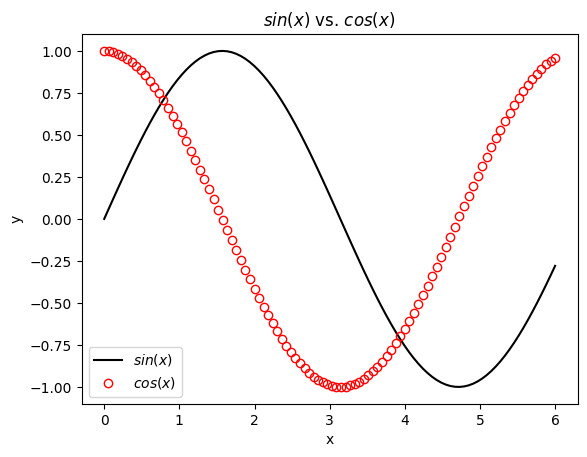

In [43]:
import matplotlib.pyplot as plt
import torch as pt

# create some data
x = pt.linspace(0, 6, 100)
y = pt.sin(x)
y2 = pt.cos(x)

# now let's plot the data
plt.plot(x, y, color="black", label="$sin(x)$")

# we can customize the lines as well
plt.plot(x, y2, color="red", label="$cos(x)$", marker="o", fillstyle="none", linestyle="None")

# add axis labels, a legend and a title
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("$sin(x)$ vs. $cos(x)$")

# in order to diplay the plot, we need to call the show() method
plt.show()

### Scatter plots

In the same way, we can create scatter plots using the `scatter` method:

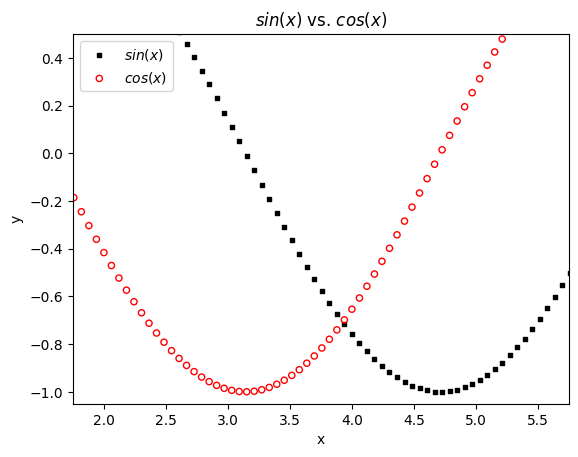

In [44]:
# this time, let's plot the data as scatter plot, s = size of markers
plt.scatter(x, y, color="black", label="$sin(x)$", s=5, marker="s")
plt.scatter(x, y2, color="red", label="$cos(x)$", s=20, marker="o", facecolors="none")

# zoom in a little bit by setting new x- and y-limits
plt.xlim(1.75, 5.75)
plt.ylim(-1.05, 0.5)

# the rest is the same...
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("$sin(x)$ vs. $cos(x)$")
plt.show()

### Contour and filled contour plots

Further, contour plots can be created in order to visualize $3D-$data with the `contour()` method:

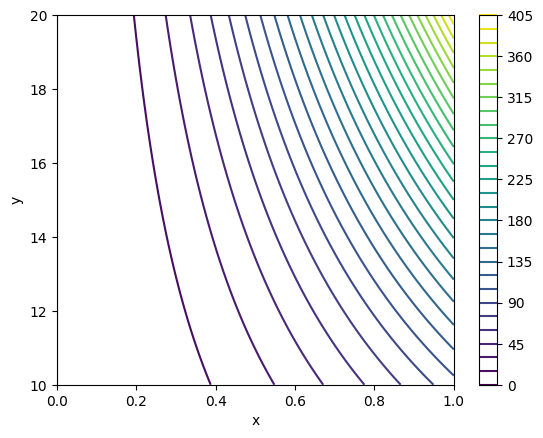

In [45]:
from numpy import meshgrid
# create 3D-data
x = pt.linspace(0, 1, 100)
y = pt.linspace(10, 20, 100)

# in order to get one datapoint for each (x, y) tuple, we create a grid of (x, y) tuples with meshgrid
x_new, y_new = meshgrid(x, y)

# now we can use the grid to generate a matrix of data in z-direction, so for each (x, y) tuple there exist one z data point
z = x_new**2 * y_new**2

# now create contour plot, levels = number of isolines in the plot
plt.contour(x, y, z, levels=30)

# again we can add some labels and a colorbar
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()


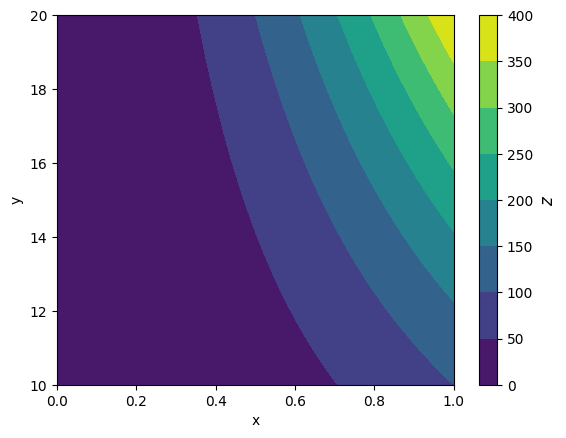

In [46]:
# alternatively, we can use the contourf() method for making 3D-plots:
plt.contourf(x, y, z)
plt.xlabel("x")
plt.ylabel("y")

# in general, the colorbar can be further customized
cbar = plt.colorbar()
cbar.set_label(label="$z$", fontsize=12)
plt.show()

### Sub-plots

Instead of only creating one plot at a time, Matplotlib provides a `subplots()` method for creating multiple plots within one figure, which also allows us to customize our plots further. There exists a variety of options, which can be found in the [subfigures](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) documentation. A possible implementation could be:

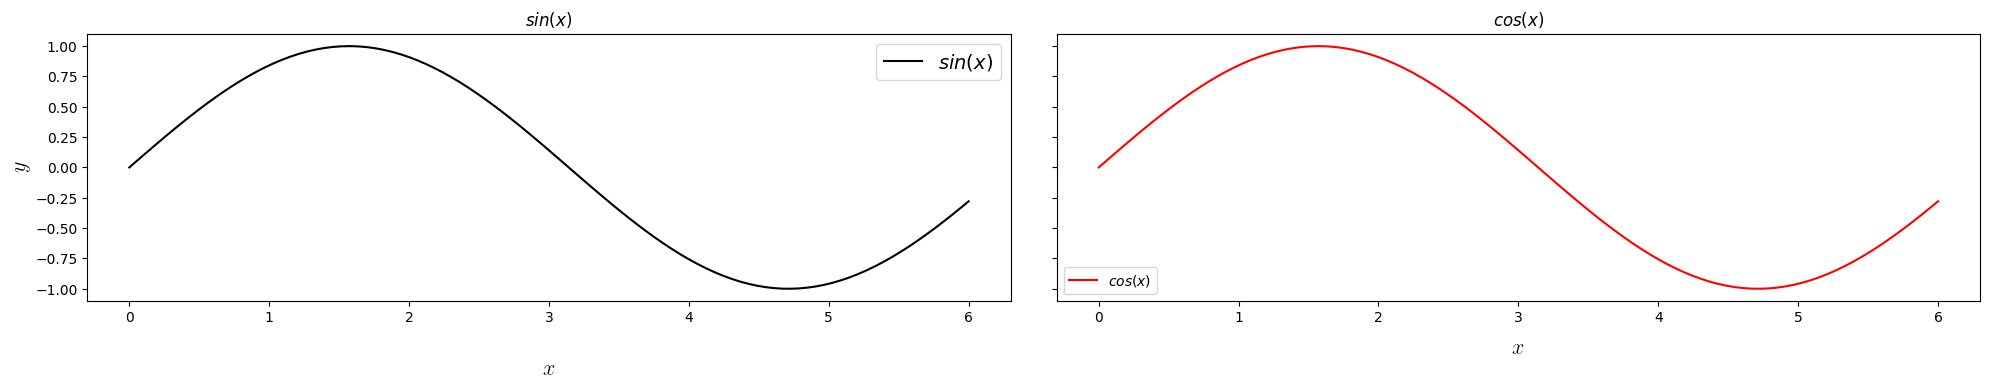

In [47]:
# use the data we already created when plotting the sin(x) and cos(x), but this time we want them to be in seperate plots
x = pt.linspace(0, 6, 100)
y = pt.sin(x)
y_2 = pt.cos(x)

# now we create a subfigure with 2 columns and one row, but both plots should have the same y-axis, further
# we want the figure to have a size of 20x4 (width x heigth)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 4), sharey=True)

# let's plot the data ax referes to the axis on which we want to plot the data (counting from left -> right)
ax[0].plot(x, y, color="black", label="$sin(x)$")
ax[1].plot(x, y, color="red", label="$cos(x)$")

# when adding labels, the method is now called with a 'set_...' in front of the methods
ax[0].set_ylabel("$y$", usetex=True, fontsize=16)

# we can increase the space between the x-ticks and the axis label using the keyword 'labelpad' as well
ax[0].set_xlabel("$x$", usetex=True, fontsize=16, labelpad=25)
ax[1].set_xlabel("$x$", usetex=True, fontsize=16, labelpad=10)

# we can set different subtitles as well
ax[0].set_title("$sin(x)$")
ax[1].set_title("$cos(x)$")

# and also customize the legend
ax[0].legend(loc="upper right", fontsize=14)
ax[1].legend(loc="lower left", fontsize=10)

# and adjust the white space between the subplots, so it looks a little bit nicer
fig.tight_layout()
fig.subplots_adjust(wspace=0.05, top=0.9)

plt.show()

## PyTorch

### Working with tensors

The [PyTorch](https://pytorch.org/docs/stable/index.html) library provides efficient data structures for operating with large amounts of data, e.g. tensors as well as tools for deep learning and neural networks. The following section gives a brief overview on what tensors are and how to how to operate with them. [Tensors](https://pytorch.org/docs/stable/tensors.html) store elements of a certain type, e.g., floating point numbers in a multi-dimensional matrix. In general, tensors need to be initialized for example with zeros before operating with them, similar to [numpy arrays](https://numpy.org/doc/stable/reference/generated/numpy.array.html). The size of a tensor is defined when initializing the tensor using the keyword argument `size`.

In [48]:
import torch as pt

# creating a 1x1 tensor filled with zeros, the size argument takes a tuple with (number of rows, number of columns)
t = pt.zeros(size=(1, 1))
print("1x1 tensor:\n", t)

# similarily, we can create an column vector [x, y, z]^T filled with zeros
t = pt.zeros(size=(3, 1))
print("\n3x1 column vector:\n", t)

# in the same way, we can also create a 3x3 matrix filled with ones
t = pt.ones(size=(3, 3))
print("\n3x3 matrix:\n", t)

1x1 tensor:
 tensor([[0.]])

3x1 column vector:
 tensor([[0.],
        [0.],
        [0.]])

3x3 matrix:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


Alternatively, other data types such as lists can be converted to tensors. It is important that the list elements have to be of the same data type.

In [49]:
# creating a list and converting it to a tensor
a = [1, 2, 3]
a_tensor = pt.tensor(a)
print("original list:\n", a)
print("\nconverted to tensor:\n", a_tensor)

# this also works for nested lists
b = [[1, 2], [3, 4]]
b_tensor = pt.tensor(b)
print("\noriginal list:\n", b)
print("\nconverted to tensor:\n", b_tensor)

original list:
 [1, 2, 3]

converted to tensor:
 tensor([1, 2, 3])

original list:
 [[1, 2], [3, 4]]

converted to tensor:
 tensor([[1, 2],
        [3, 4]])


When converting lists to tensors, some problems may occur as shown in the following examples:

In [50]:
# all list elements have to be of the same data type, otherwise an error occurs:
a = [1, 2, "a"]
b = pt.tensor(a)

TypeError: new(): invalid data type 'str'

In [51]:
# also if nested lists are to be converted, the dimensions have to be consistent throughout the list
a = [[1, 2], [3, 4, 5]]

# this is not working, because 1st element is 2 long and 2nd element has a length of 3
b = pt.tensor(a)

ValueError: expected sequence of length 2 at dim 1 (got 3)

When initializing a tensor, the size of the tensor needs to be defined. The general syntax for the `size` argument is `size=(dim=0, dim=1, dim=2, ...)`, the first dimension `dim=0` refers to the number of rows and `dim=1` to the number of columns. The $3^{rd}$ dimension denotes the number of elements within each element of the (dim=0 * dim=1) sized matrix and so on. When operating with tensors, single elements can be accessed as well as complete columns, rows or matrices within the tensor, which will be illustrated by the following examples. A more comprehensive introduction can be found in the [PyTorch docs](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) for tensors.

In [52]:
# create a 2x3 tensor filled with random numbers
random_tensor = pt.randn(size=(3, 3))

# this tensor has 3 rows and 3 columns
print("3x3 tensor with random numbers:\n", random_tensor)

3x3 tensor with random numbers:
 tensor([[ 0.8542, -0.5405,  0.0738],
        [-1.2996, -0.7715,  0.0630],
        [-0.1926,  1.5318,  0.7864]])


In [53]:
# now let's access the 2nd element of the first row (indices start at zero)
print("2nd element of 1st row: ", random_tensor[0, 1])

# we can also access the last element of the 1st row by using [-1] as index:
print("last element of 1st row:", random_tensor[0, -1])

# complete rows or columns can be accessed by using [:]
print("\nall columns of 1st row:", random_tensor[0, :])
print("all rows of 2nd colunm:", random_tensor[:, 1])

# now lets get the a 2x2 submatrix of the tensoor containing the rows 1, 2 and columns 1, 2:
print("\n2x2 matrix of tensor:\n", random_tensor[:2, :2])

# similarily, we can get the elements of the last two rows and columns:
print("\n2x2 matrix of tensor:\n", random_tensor[1:, 1:])

2nd element of 1st row:  tensor(-0.5405)
last element of 1st row: tensor(0.0738)

all columns of 1st row: tensor([ 0.8542, -0.5405,  0.0738])
all rows of 2nd colunm: tensor([-0.5405, -0.7715,  1.5318])

2x2 matrix of tensor:
 tensor([[ 0.8542, -0.5405],
        [-1.2996, -0.7715]])

2x2 matrix of tensor:
 tensor([[-0.7715,  0.0630],
        [ 1.5318,  0.7864]])


In [54]:
# further, we can specify ranges which we want to access
random_tensor = pt.rand(size=(4, 4))
print("original tensor:\n", random_tensor)
      
# get columns 1-3 and rows 2-4
print("\nrows 1-3 & columns 2-4:\n", random_tensor[1:3, 2:4])

original tensor:
 tensor([[0.1845, 0.8458, 0.7495, 0.2527],
        [0.6816, 0.2572, 0.0531, 0.6476],
        [0.0690, 0.2585, 0.7352, 0.8128],
        [0.1855, 0.8100, 0.8889, 0.6107]])

rows 1-3 & columns 2-4:
 tensor([[0.0531, 0.6476],
        [0.7352, 0.8128]])


As can be seen in this example, when using the range `[1:3, 2:4]`, the stop indices `3, 4` are excluded resulting in a 2x2 tensor as output. In general, the size of a tensor can be determined by using the `size()` method:

In [55]:
# get the size of this tensor
print("size of the original tensor: ", random_tensor.size())
print("\nsize of the sub-matrix within the tensor: ", random_tensor[1:3, 2:4].size())

size of the original tensor:  torch.Size([4, 4])

size of the sub-matrix within the tensor:  torch.Size([2, 2])


### Common tensor operations

#### Algebraic operations

A great advantage of using tensors is the fact that algebraic operations, such as elements-wise addition, can easily be done using `+, -, *, /`:

In [56]:
# create two tensors
a = pt.tensor([1, 2, 3])
b = pt.tensor([1, 1, 1])

# now add them element-wise:
c = a + b
print(c)

# of course, this can be extended to higher dimensions:
x = pt.randint(low=0, high=5, size=(2, 3))
y = pt.randint(low=0, high=5, size=(2, 3))
print("\nx = ", x)
print("\ny = ", y)
print("\nx + y = ", x + y)

tensor([2, 3, 4])

x =  tensor([[3, 0, 1],
        [1, 0, 1]])

y =  tensor([[3, 2, 3],
        [0, 1, 2]])

x + y =  tensor([[6, 2, 4],
        [1, 1, 3]])


In [57]:
# a matrix-vector product can be computed using @
x = pt.randint(low=0, high=3, size=(2, 3))
y = pt.randint(low=0, high=3, size=(3, 1))
print("x = \n", x)
print("\ny = \n", y)

# compute the matrix-vector product of x and y
print("\nx * y = \n", x @ y)

x = 
 tensor([[0, 2, 2],
        [1, 1, 0]])

y = 
 tensor([[1],
        [2],
        [1]])

x * y = 
 tensor([[6],
        [3]])


#### flatten()
 
The `flatten()` method reshapes an arbitrary $n$-dimensional tensor to a one-dimensional tensor:

In [58]:
# create tensor
x = pt.rand(size=(2, 3))

# then flatten the tensor
y = x.flatten()

print("original tensor:\n", x)
print("\nflattened tensor:\n", y)
print("\nsize of original tensor:", x.size())
print("size of flattened tensor:", y.size())

original tensor:
 tensor([[0.0477, 0.1436, 0.2791],
        [0.2164, 0.3674, 0.8587]])

flattened tensor:
 tensor([0.0477, 0.1436, 0.2791, 0.2164, 0.3674, 0.8587])

size of original tensor: torch.Size([2, 3])
size of flattened tensor: torch.Size([6])


#### reshape()

In contrast to `flatten()`, `reshape()` can be used to reshape a tensor to specific dimensions instead of reshaping it to a one-dimensional tensor. An important requirement for using the `reshape()` method is that the output tensor has the same number of elements as the input tensor.

In [59]:
# create tensor with 6 rows and 2 columns
x = pt.rand(size=(6, 2))
print("original tensor:\n", x)

# reshape it to a row-vector
y = pt.reshape(x, shape=(1, 12))
print("\nreshaped tensor:\n", y)

# alternatively, reshape it to a matrix with 3 rows and 4 columns
z = pt.reshape(x, shape=(3, 4))
print("\nreshaped tensor:\n", z)

original tensor:
 tensor([[1.6751e-01, 5.2408e-01],
        [1.2265e-01, 9.9639e-01],
        [4.5478e-05, 9.4439e-02],
        [9.5436e-01, 2.5640e-01],
        [3.2345e-01, 3.0902e-01],
        [2.2105e-01, 8.5098e-01]])

reshaped tensor:
 tensor([[1.6751e-01, 5.2408e-01, 1.2265e-01, 9.9639e-01, 4.5478e-05, 9.4439e-02,
         9.5436e-01, 2.5640e-01, 3.2345e-01, 3.0902e-01, 2.2105e-01, 8.5098e-01]])

reshaped tensor:
 tensor([[1.6751e-01, 5.2408e-01, 1.2265e-01, 9.9639e-01],
        [4.5478e-05, 9.4439e-02, 9.5436e-01, 2.5640e-01],
        [3.2345e-01, 3.0902e-01, 2.2105e-01, 8.5098e-01]])


When using `reshape()` the dimensions have to match, meaning the number of elements need to be the same. The following will not work:

In [60]:
# create tensor
x = pt.rand(size=(6, 2))

# this will not work since x has 6*2=12 elements and y would only have 3*3=9 elements
y = pt.reshape(x, shape=(3, 3))

RuntimeError: shape '[3, 3]' is invalid for input of size 12

#### squeeze() and unsqueeze()

The `squeeze()` method removes dimensions with the size of $1$ from a tensor. If we have for example a $3x2x1$-dimensional tensor, using the `squeeze()` method would lead to a tensor with the dimensions of $3x2$ by removing the $3^{rd}$ dimension (since the $3^{rd}$ dimension is $1$). If there exist multiple dimensions with the size of $1$, using `squeeze()` removes all of them. A specific dimension which shall be removed can be specified by the keyword argument `dim`, in case this is unwanted. The `squeeze()` method is frequently used, e.g. when passing features into a neural network, as shown in [lecture 3](https://github.com/AndreWeiner/ml-cfd-lecture/blob/main/notebooks/ml_intro.ipynb). Consequently, the `unsqueeze()` method inserts a dimension of the size $1$ at a specified dimension of the input tensor.

In [61]:
# create tensor
x = pt.rand(size=(3, 1))

# then squeeze the tensor
y = x.squeeze()

# unsqueeze the tensor in "row"-dimension
z = y.unsqueeze(dim=0)

# unsqueeze the tensor in "column"-dimension
z_2 = y.unsqueeze(dim=1)

print("original tensor:\n", x)
print("\nsqueezed tensor:\n", y)
print("\nunsqueezed tensor (dim=0):\n", z)
print("\nunsqueezed tensor (dim=1):\n", z_2)

print("\nsize of original tensor:", x.size())
print("size of squeezed tensor:", y.size())
print("size of unsqueezed tensor (dim=0):", z.size())
print("size of unsqueezed tensor (dim=0):", z_2.size())

original tensor:
 tensor([[0.0253],
        [0.2249],
        [0.8712]])

squeezed tensor:
 tensor([0.0253, 0.2249, 0.8712])

unsqueezed tensor (dim=0):
 tensor([[0.0253, 0.2249, 0.8712]])

unsqueezed tensor (dim=1):
 tensor([[0.0253],
        [0.2249],
        [0.8712]])

size of original tensor: torch.Size([3, 1])
size of squeezed tensor: torch.Size([3])
size of unsqueezed tensor (dim=0): torch.Size([1, 3])
size of unsqueezed tensor (dim=0): torch.Size([3, 1])


In [62]:
# by using the keyword argument 'dim', the dimension to be removed can be specified in case there exist multiple dimensions with the size of 1
x = pt.rand(size=(1, 3, 1, 2))

# remove all dimesions with the size of 1
y = x.squeeze()

# only remove the last dimension
z = x.squeeze(dim=2)

print("original tensor:\n", x)
print("\nsqueezed tensor:\n", y)
print("\nsqueezed tensor for 3rd dim:\n", z)

print("\nsize of original tensor:", x.size())
print("size of squeezed tensor:", y.size())
print("size of squeezed tensor for 3rd dim:", z.size())

original tensor:
 tensor([[[[0.2098, 0.6956]],

         [[0.0179, 0.2699]],

         [[0.9126, 0.5275]]]])

squeezed tensor:
 tensor([[0.2098, 0.6956],
        [0.0179, 0.2699],
        [0.9126, 0.5275]])

squeezed tensor for 3rd dim:
 tensor([[[0.2098, 0.6956],
         [0.0179, 0.2699],
         [0.9126, 0.5275]]])

size of original tensor: torch.Size([1, 3, 1, 2])
size of squeezed tensor: torch.Size([3, 2])
size of squeezed tensor for 3rd dim: torch.Size([1, 3, 2])


#### zeros() vs. zeros_like()

In the previous examples, tensors were always initialized with zeros using the `zeros()` method. The `zeros_like()` method, however, is an efficient way to generate a tensor filled with zeros by using another tensor. For example, consider having a tensor $x$ filled with some values and we want to create a tensor $y$, which has the same size of $x$ but is filled with zeros. Instead of using `y = pt.zeros(size=x.size())` we can create $y$ as `y = pt.zeros_like(x)`.

In [63]:
# creating a tensor filled with zeros
x = pt.zeros(size=(2, 2))

# create tensor filled with some random numbers
y = pt.rand(size=(2, 2))

# use zeros_like() to create tensor of the same shape as y, but filled with zeros
z = pt.zeros_like(y)

print("tensor initialized with zeros:\n", x)
print("\ntensor initialized with random numbers:\n", y)
print("\nusing zeros_like() method:\n", z)

tensor initialized with zeros:
 tensor([[0., 0.],
        [0., 0.]])

tensor initialized with random numbers:
 tensor([[0.9372, 0.7361],
        [0.4246, 0.0939]])

using zeros_like() method:
 tensor([[0., 0.],
        [0., 0.]])


#### min() vs. argmin() 
The `min()` method in torch returns the minimum of a $n-$dimensional tensor. In a lot of cases, additionally the position of the minimum element is required. To get the index of the minimum element, we can use the `argmin()` method of torch. The maximum element and it's position can analogously be determined by using `max()` and `argmax()` respectively.

In [64]:
# creating tensor filled with random numbers
x = pt.rand(size=(1, 5))

print("x = ", x)
print(f"min(x) = {'{:.4f}'.format(pt.min(x).item())} at position {pt.argmin(x).item()}")

x =  tensor([[0.3612, 0.5508, 0.3000, 0.8544, 0.4987]])
min(x) = 0.3000 at position 2


#### Combining tensor operations

We only looked at single tensor operations so far. When programming in Python, however, we can combine these methods in order shorten the code while at the same time making it more efficient. The following example illustrates a possible implementation for calculating the $L_2-$norm of a vector:

In [65]:
# let's define two vectors
x = pt.rand(size=(3, 1))
y = pt.rand(size=(3, 1))

# now we want to calculate the L2-norm between the vector elements without combining methods
l2 = x-y
l2 = l2.square()
l2 = l2.mean()
print("L2(x, y) = ", l2.item())

# a more clear and efficient way:
print("L2(x, y) = ", (x-y).square().mean().item())

L2(x, y) =  0.0909828171133995
L2(x, y) =  0.0909828171133995


## 5. Handling column-like data with Pandas

[Pandas](https://pandas.pydata.org/) is a library providing many tools for data analysis. In Pandas so called `DataFrame`s are largely used, which is a similar way of structuring data as in the built-in `dict()`. Since Pandas provides a vast amount of tools, within this section only the `read_csv()` method, which is frequently used throughout the lecture and exercise, shall be presented.

The `read_csv()` method can be used to read in $.csv$ files column-like data. Although the method is named `read_csv()`, other file types can be read in as well, while the data within the files can be separated by any arbitrary separator. This separator has to be specified as keyword argument when calling the function. The following example illustrates a possible use of the `read_csv()` method. 

In [66]:
dummy_str = """
       XFOIL         Version 6.93
  
 Calculated polar for: NACA 67-414                                     
  
 1 1 Reynolds number fixed          Mach number fixed         
  
 xtrf =   1.000 (top)        1.000 (bottom)  
 Mach =   0.500     Re =     5.000 e 6     Ncrit =  13.000 13.000
  
  alpha     CL        CD       CDp       CM    Top_Xtr Bot_Xtr    CQ       CDq  
 ------- -------- --------- --------- -------- ------- ------- -------- --------
   0.000   0.4239 0.0032031 0.0010239  -0.1011  0.7862  0.7914  0.00000  0.00000
   0.250   0.4581 0.0032021 0.0010260  -0.1015  0.7833  0.7957  0.00000  0.00000
   0.500   0.4914 0.0032155 0.0010364  -0.1017  0.7799  0.7989  0.00000  0.00000
   0.750   0.5251 0.0032287 0.0010587  -0.1020  0.7757  0.8017  0.00000  0.00000
   1.000   0.5594 0.0032471 0.0010826  -0.1024  0.7717  0.8043  0.00000  0.00000
   1.250   0.5917 0.0032885 0.0011012  -0.1023  0.7661  0.8058  0.00000  0.00000
   1.500   0.6259 0.0032757 0.0011005  -0.1027  0.7603  0.8069  0.00000  0.00000
   1.750   0.6575 0.0032830 0.0011012  -0.1025  0.7521  0.8084  0.00000  0.00000
   2.000   0.6872 0.0033220 0.0011216  -0.1018  0.7399  0.8093  0.00000  0.00000
"""

# we wrap the string above in a file-like object
from io import StringIO

dummy_csv = StringIO(dummy_str)

Now, we want to read in this data using the `read_csv()` method. Firstly, we need to get rid of the header since it contains no relevant data. This can be achieved by using the keyword `skiprow=9`, meaning we want to ignore whatever data is in rows $0-9$. Secondly, we have to define the separator as white space `sep=r"\s+"`, because our data is not separated by commas, which is the default value for the `read_csv()` method. Lastly, we want the names of the columns in the file to be the names in the dataframe in order to access them later by name. This can be done using the keyword `header=0`, meaning we want the strings in the $1^{st}$ row to be set as column names (we neglect the rows $0...9$, therefore pandas starts to read in at row $10$ of the original data file).

In [67]:
from pandas import read_csv

# let's import this file
# for a real .csv file, replace dummy_csv with the file path
data = read_csv(dummy_csv, sep=r"\s+", skiprows=9, header=0)

# we can print out the first few lines to see if we did everything correcly using data.head():
print(data.head())

     alpha        CL         CD        CDp        CM  Top_Xtr  Bot_Xtr  \
0  -------  --------  ---------  ---------  --------  -------  -------   
1    0.000    0.4239  0.0032031  0.0010239   -0.1011   0.7862   0.7914   
2    0.250    0.4581  0.0032021  0.0010260   -0.1015   0.7833   0.7957   
3    0.500    0.4914  0.0032155  0.0010364   -0.1017   0.7799   0.7989   
4    0.750    0.5251  0.0032287  0.0010587   -0.1020   0.7757   0.8017   

         CQ       CDq  
0  --------  --------  
1   0.00000   0.00000  
2   0.00000   0.00000  
3   0.00000   0.00000  
4   0.00000   0.00000  


Alternatively, we can specify which columns we want to read in using the keyword `usecols` and change the names of these columns as well with the keyword `names`:

In [68]:
# only read in the 1st two columns and give them a different name
data = read_csv(StringIO(dummy_str), sep=r"\s+", skiprows=9, header=0, usecols=[0, 1], names=["aoa", "cl"])
print(data.head())

       aoa        cl
0  -------  --------
1    0.000    0.4239
2    0.250    0.4581
3    0.500    0.4914
4    0.750    0.5251


The data in the dataframe can now be accessed by the names of the columns, similarly to dicts, e.g., by typing `aoa = data["aoa"]`, we would assign all the data of the `aoa` column to the variable `aoa`.

## Dealing with error messages and debugging code

When writing code, making mistakes is envidable. The following section deals with common mistakes when writing code and how to interpret and solve error messages. However, the here presented suggestions and examples should be understand just as guidance, since everybody follows a slighty different approach when it comes to dealing with bugs.

In general, the usage of an integrated development environment (IDE) such as [Visual Studio Code](https://code.visualstudio.com/) or [PyCharm](https://www.jetbrains.com/pycharm/) is highly recommended. IDE's provide useful tools for software development, e.g. a debugger, in which the written code can be debugged. The code can here be executed line-by-line while all relevant information is displayed and directly accessible. Further, IDE's provide useful functionality such as autocomplete and automatically enclosing any open brackets, which makes writing code faster and less prone to errors.

When encountering an error, the python interpreter displays an error message, as already shown in some of the previous examples. The error message itself consists of the position of the error (line where the error was encountered) and what the error actually is (error message). In more complex code, Python additionally provides a so called $traceback$ of the error, which represents the complete "path" from the main script (or function) to the line of code where the error was encountered.

Let's have a look at some common errors and possible way how to fix them.

In [70]:
# 1st example: indentation error
for i in range(3):
    if i == 1:
        print(i)
   else:
        print(i+1)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In this example, the code itself seems to be fine. A look at the end of the error message, however, tells us that there is something wrong with the `else` statement. The `IndentationError` occurs, if the blocks of code are not aligned correctly. We can fix this by adding one space in front of the `else` statement, so that it is aligned with the `if` statement.

In [71]:
# 2nd example: how to deal with tracebacks
import matplotlib.pyplot as plt

# create some function for plotting data
def plot_data(x, y):
    fig, ax = plt.subplot(1, 1)
    ax.plot(x, y, color="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.show()
    
# 'if __name__=="__main__":' means that the following code is only executed when this script is executed as 'main',
# but if we call the 'plot_data' function from another script, this won't be executed
if __name__=="__main__":
    x = [1, 2, 3]
    y = [0.5, 0.8, 1.5]
    plot_data(x, y)
    

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In this example, the error message looks quite complicated. Note that the exact message depends on the installed version of matplotlib. The last line of the error message tells us that we encountered a `TypeError` due to invalid arguments for the method `plt.subplot()`. Whenever getting an error caused by libraries, it is likely that we made a mistake in our code rather than that the library has a bug, since in general libraries are tested and regularly updated. So in this case it makes sense to start at the top of the error message. The first entry tells us that the error has something to do with calling out `plot_data()` function in the main script. Within this function, the statement `fig, ax = plt.subplot(1, 1)` is listed as next in the error message. Something in this line caused matplotlib to raise a `TypeError` as shown by the $3^{rd}$ entry of the error message. By looking again into our `plot_data()` function, we can see that we typed `plt.subplot()` instead of `plt.subplots()` which then lead to this error because we our arguemnts where meant for the latter function.

In a lot of cases the cause of an error is rather simple as shown in the previous examples. Some commonly made mistakes may be:

- forgotten or wrong brackets, e.g. using `()` instead of `[]` when trying to access elements of a list (in contrast to other languages such as Matlab, where `()` is used to access elements)
- too many brackets, e.g. because some expression was deleted but the closing bracket is still present: `call_some_method(parameter))`
- confusing similar methods, such as `plt.xlabel("...")` vs. `ax.set_xlabel("...")` methods within the matplotlib.pyplot library
- using a wrong separator when reading in files, e.g., with the pandas library
- Python is quite sensitive to indents (in contrast to other languages such as C++), meaning each block of code needs to be aligned

## References

### Python documentation:

- [python docs](https://docs.python.org/3.3/library/functions.html) for built-in functions
- [python docs](https://docs.python.org/3/tutorial/controlflow.html) for flow control statements
- [python docs](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques) for lists
- [python docs](https://docs.python.org/3/tutorial/classes.html) for classes (especially section 9.3, 9.5)
- [python docs](https://docs.python.org/3/glossary.html#term-decorator) for decorators
- [python docs](https://docs.python.org/3.3/library/functions.html#property) for the @property decorator
- [flowTorch](https://flowmodelingcontrol.github.io/flowtorch-docs/1.1/index.html) library
- [Matplotlib](https://matplotlib.org/stable/index.html) library
- [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method in pandas
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) user guide
- [PyTorch docs](https://pytorch.org/docs/stable/index.html) general
- [PyTorch docs](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) for tensors

### Other references:

- [lambda expressions](https://realpython.com/python-lambda/)
- [decorators](https://realpython.com/primer-on-python-decorators/)
- [Python Decorators in 15 Minutes](https://www.youtube.com/watch?v=r7Dtus7N4pI)